# Data Understanding

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/dancan123/Academic-papers-/main/nlsw88.csv')

Preview of the first 10 rows:

In [6]:
df.head(10)

idcode  age   race  married     never_married  grade          collgrad  \
0       1   37  Black   Single  Has been married   12.0  Not college grad   
1       2   37  Black   Single  Has been married   12.0  Not college grad   
2       3   42  Black   Single     Never married   12.0  Not college grad   
3       4   43  White  Married  Has been married   17.0      College grad   
4       6   42  White  Married  Has been married   12.0  Not college grad   
5       7   39  White  Married  Has been married   12.0  Not college grad   
6       9   37  White   Single  Has been married   12.0  Not college grad   
7      12   40  White  Married  Has been married   18.0      College grad   
8      13   40  White  Married  Has been married   14.0  Not college grad   
9      14   40  White  Married  Has been married   15.0  Not college grad   

       south  smsa            c_city                industry  \
0  Not south  SMSA  Not central city  Transport/Comm/Utility   
1  Not south  SMSA      Central city           Manufacturing   
2  Not south  SMSA      Central city           Manufacturing   
3  Not south  SMSA  Not central city   Professional services   
4  Not south  SMSA  Not central city           Manufacturing   
5  Not south  SMSA  Not central city   Professional services   
6  Not south  SMSA      Central city  Transport/Comm/Utility   
7  Not south  SMSA  Not central city   Professional services   
8  Not south  SMSA  Not central city   Professional services   
9  Not south  SMSA  Not central city   Professional services   

               occupation     union   wage  hours  Total_wages  ttl_exp  \
0              Operatives     Union  11.74   48.0          563       10   
1               Craftsmen     Union   6.40   40.0          256       14   
2                   Sales       NaN   5.02   40.0          201       18   
3                   Other     Union   9.03   42.0          379       13   
4              Operatives  Nonunion   8.08   48.0          388       18   
5                   Sales  Nonunion   4.63   30.0          139        7   
6          Managers/Admin     Union  10.49   40.0          420       19   
7          Managers/Admin  Nonunion  17.21   45.0          774       16   
8                   Sales  Nonunion  13.08    8.0          105       14   
9  Professional/Technical  Nonunion   7.75   50.0          387        7   

   tenure  
0    5.33  
1    5.25  
2    1.25  
3    1.75  
4   17.75  
5    2.25  
6   19.00  
7   14.17  
8    5.50  
9    2.25

In [7]:
print(f"Dimension of our dataset: {df.shape}")

Dimension of our dataset: (2246, 18)


In [8]:
df.columns

Index(['idcode', 'age', 'race', 'married', 'never_married', 'grade',
       'collgrad', 'south', 'smsa', 'c_city', 'industry', 'occupation',
       'union', 'wage', 'hours', 'Total_wages', 'ttl_exp', 'tenure'],
      dtype='object')

The Dataset has 2246 entries representing individuals and 17 columns representing the attributes or features describing each individuals. Here are some of the attributes:

- `idcode` → unique identifier for each individual.
- `age` → Represents the age of individuals in the dataset.
- `race` → Racial group of the individual.
- `married` & `never_married` → indicate marital status.
- `grade` → The grade points
- `collgrad` → college graduation status.
- `south`, `smsa`, `c_city` →  geogrphical indicators.
- `industry` & `occupation` → Describe the industry and job role of individuals.
- `union` → Might indicate whether a person is part of a labor union.
- `wage` → Represents earnings
- `hours` → denotea hours worked.
- `ttl_exp` → Possibly total work experience
- `tenure` → Could represent job tenure (time spent in the current job).

# Data Cleaning

**Checking for Duplicates, Whitespaces and Missing values**

In [12]:
#checking for duplicates
print(f"Number of Duplicates: {df.duplicated().sum()}")

# Check for whitespaces in string columns
print(f"Number of Whitespaces: {df.applymap(lambda x: isinstance(x, str) and (x != x.strip())).sum().sum()}")

#checking for missing values
print("Number of Missing Values per column:")
df.isnull().sum()

Number of Duplicates: 0
Number of Whitespaces: 0
Number of Missing Values per column:


idcode             0
age                0
race               0
married            0
never_married      0
grade              2
collgrad           0
south              0
smsa               0
c_city             0
industry          14
occupation         9
union            368
wage               0
hours              4
Total_wages        0
ttl_exp            0
tenure            15
dtype: int64

**Handling Missing Values**

To handle missing values in the dataset, we will apply different strategies for each column. In the `grade` column, the 2 missing values will be replaced with `0`, indicating that the individuals either did not take the test or received a grade of 0, as this value already exists in the dataset. For the `industry` column, a new category called `Other` will be introduced in place of the missing values. Similarly, in the `occupation` column, missing values will be replaced with `Other`, which is an existing category. For `hours` and `tenure`, the missing values will be replaced with `0` to reflect the absence of recorded work hours or tenure. Lastly, since the number of missing values in the `union` column is relatively high, a new category, `NotMentioned`, will be introduced as a placeholder.

In [13]:
df['grade'].fillna(0, inplace=True)
df['grade'].fillna(0, inplace=True)
df['occupation'].fillna('Other', inplace=True)
df['hours'].fillna(0, inplace=True)
df['tenure'].fillna(0, inplace=True)
df['union'].fillna('NotMentioned', inplace=True)

#finally checking for any more missing values
df.isnull().sum().sum()


np.int64(14)

**Standardizing Formats**

Ensuring categorical columns use the Category data type and converting relevant data types where needed.

In [14]:
for col in ['race', 'married', 'never_married', 'collgrad', 'south', 'smsa', 'c_city', 'industry', 'occupation', 'union']:
    df[col] = df[col].astype(pd.CategoricalDtype())

df[['grade', 'hours']] = df[['grade', 'hours']].astype(int)

In [15]:
#checking that they are all standardized
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   idcode         2246 non-null   int64   
 1   age            2246 non-null   int64   
 2   race           2246 non-null   category
 3   married        2246 non-null   category
 4   never_married  2246 non-null   category
 5   grade          2246 non-null   int64   
 6   collgrad       2246 non-null   category
 7   south          2246 non-null   category
 8   smsa           2246 non-null   category
 9   c_city         2246 non-null   category
 10  industry       2232 non-null   category
 11  occupation     2246 non-null   category
 12  union          2246 non-null   category
 13  wage           2246 non-null   float64 
 14  hours          2246 non-null   int64   
 15  Total_wages    2246 non-null   int64   
 16  ttl_exp        2246 non-null   int64   
 17  tenure         2246 non-null   fl

In [11]:
#saving the cleaned data
#Cleaned_Data = df.to_csv('cleaned_data.csv', index=False)

# Demographics
**The Distribution of Categorical Features**

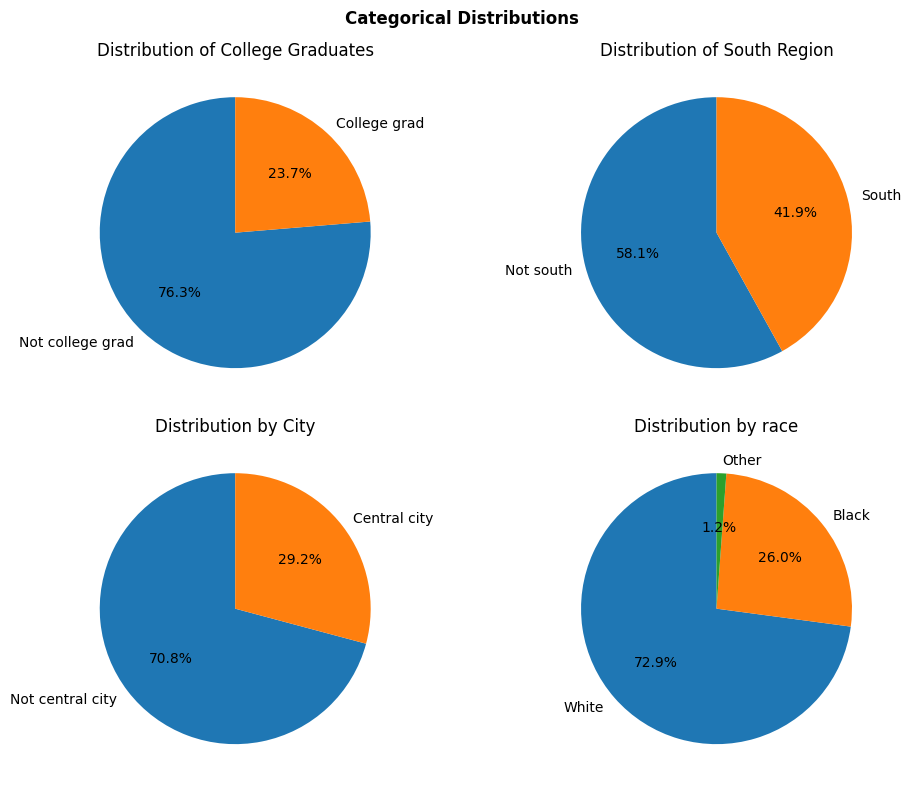

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Plot pie chart for 'collgrad'
collgrad_counts = df['collgrad'].value_counts()
axes[0].pie(collgrad_counts, labels=collgrad_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of College Graduates')

# Plot pie chart for 'south'
south_counts = df['south'].value_counts()
axes[1].pie(south_counts, labels=south_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of South Region')

# Plot pie chart for 'city'
city_counts = df['c_city'].value_counts()
axes[2].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Distribution by City')

# Plot pie chart for 'race'
race_counts = df['race'].value_counts()
axes[3].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Distribution by race')

fig.suptitle('Categorical Distributions', fontweight='bold')
plt.tight_layout();

**Observation** The categories, `Not collage grad`, `Not south`, `Not central city` and `White` hold the highest percentage in each of the categorical columns shown above.

**Percentage of College Graduates by Race and City (Relative to Total Population)**

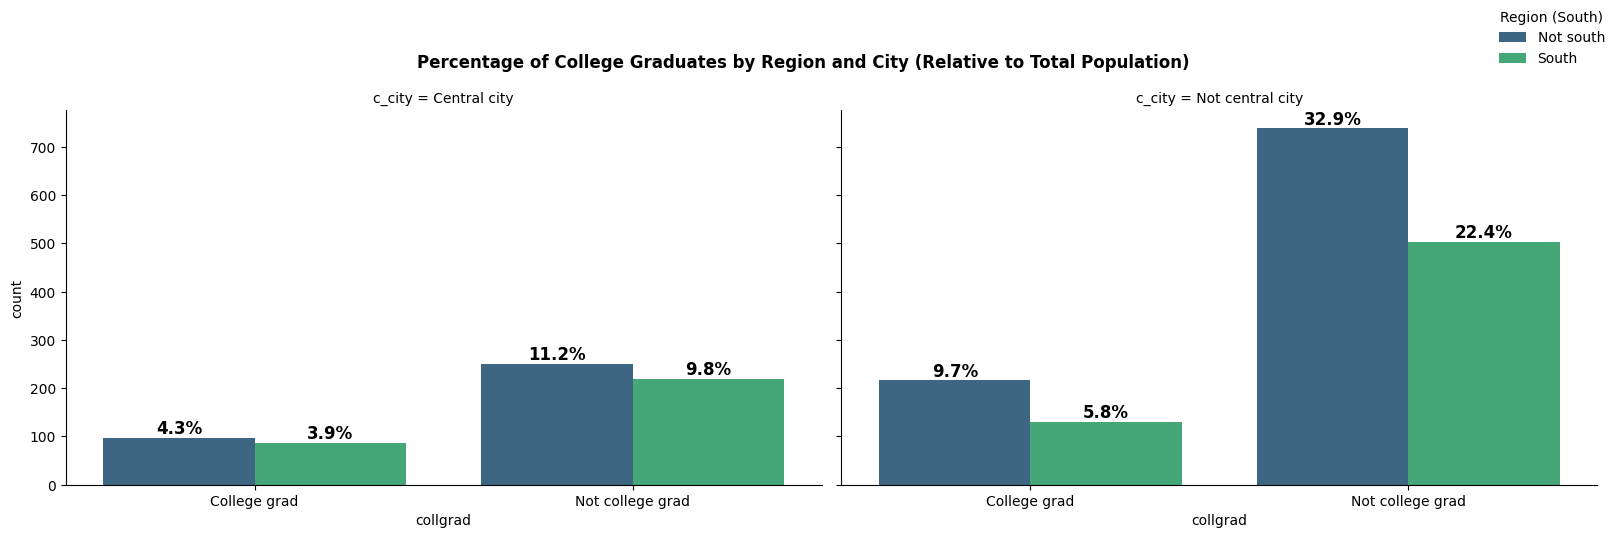

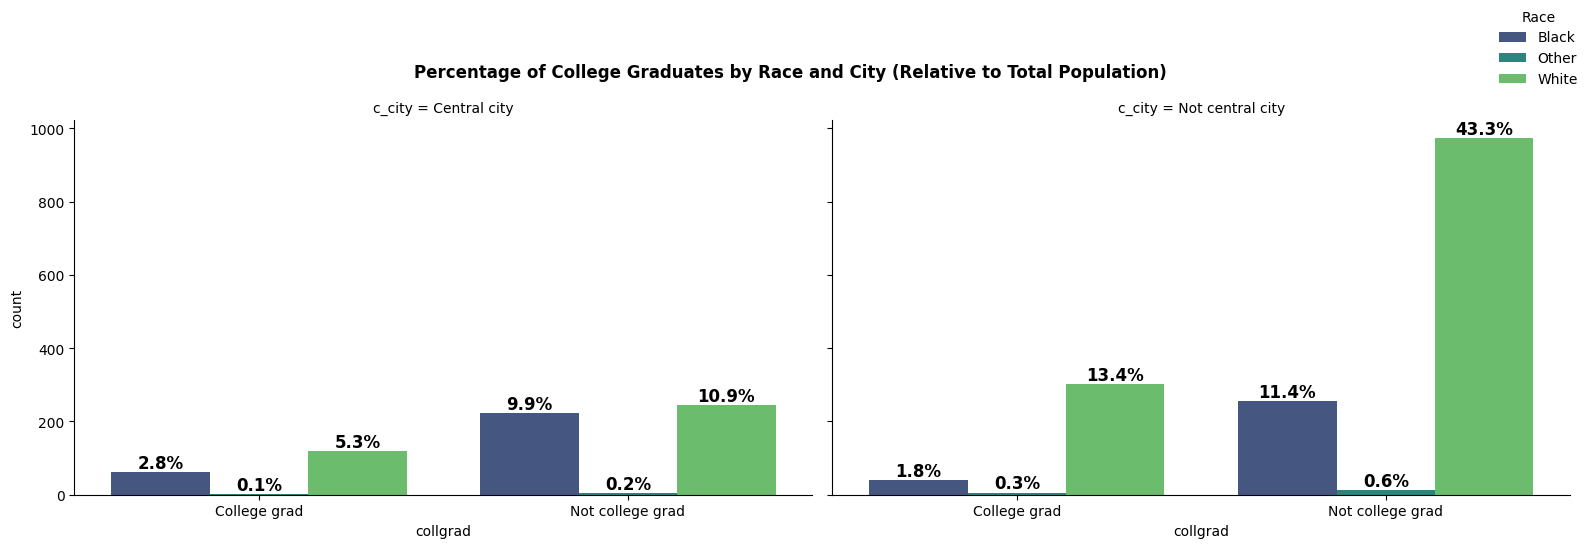

In [18]:
total_count = len(df)

g1 = sns.catplot(x='collgrad', hue='south', col='c_city', data=df, kind='count', height=5, aspect=1.5, palette="viridis")

# Adding percentage labels
for ax in g1.axes.flat:
    for p in ax.patches:
        percentage = 100 * p.get_height() / total_count
        if percentage > 0:
            ax.annotate(f"{percentage:.1f}%",
                        (p.get_x() + p.get_width()/2, p.get_height()),
                        ha='center', va='bottom', fontsize=12, fontweight='bold')

g1._legend.set_bbox_to_anchor((1, 1))
g1._legend.set_title("Region (South)")


plt.subplots_adjust(top=0.85)
plt.suptitle('Percentage of College Graduates by Region and City (Relative to Total Population)', fontweight = 'bold')

plt.tight_layout()
plt.show()

g2 = sns.catplot(x='collgrad', hue='race', col='c_city', data=df, kind='count', height=5, aspect=1.5, palette="viridis")

for ax in g2.axes.flat:
    for p in ax.patches:
        percentage = 100 * p.get_height() / total_count
        if percentage > 0:
            ax.annotate(f"{percentage:.1f}%",
                        (p.get_x() + p.get_width()/2, p.get_height()),
                        ha='center', va='bottom', fontsize=12, fontweight='bold')

g2._legend.set_bbox_to_anchor((1, 1))
g2._legend.set_title("Race")

# Set title
plt.subplots_adjust(top=0.85)
plt.suptitle('Percentage of College Graduates by Race and City (Relative to Total Population)', fontweight= 'bold')

plt.tight_layout();

**Observation:** We see that in The Region by South or not south that the Not south category records higher numbers in both the central city and not central city categories. We also observe that White Race similarily observes a higher number than Black and Other races(which is the lowest) in both Cenral city and not central city categories

**Distribution of Industry and Occupation Categories**

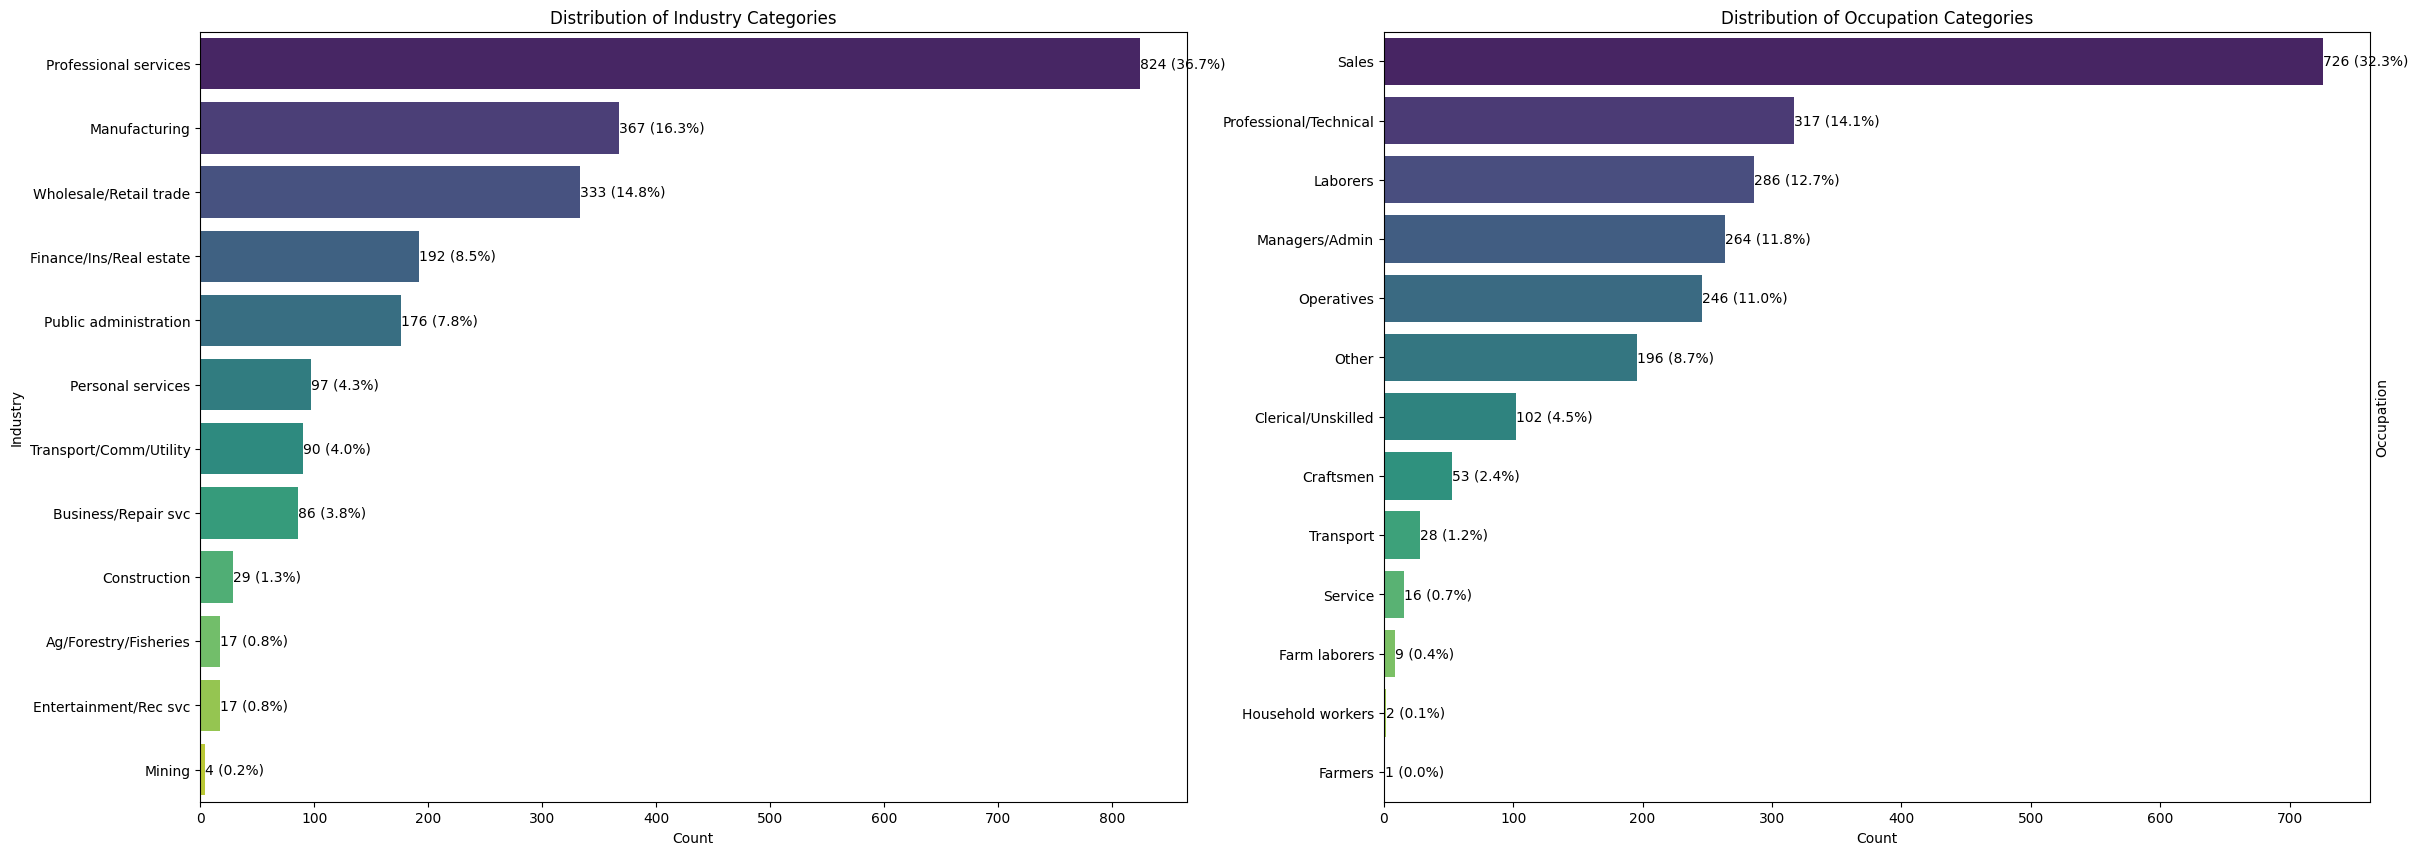

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))

total_industry = len(df)
total_occupation = len(df)

sns.countplot(data=df, y='industry', order=df['industry'].value_counts().index, palette="viridis", ax=ax1)

for p in ax1.patches:
    count = int(p.get_width())
    percentage = f"{100 * count / total_industry:.1f}%"
    ax1.annotate(f"{count} ({percentage})",
                 (count, p.get_y() + p.get_height()/2),
                 ha='left', va='center')

ax1.set_xlabel("Count")
ax1.set_ylabel("Industry")
ax1.set_title("Distribution of Industry Categories")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')


sns.countplot(data=df, y='occupation', order=df['occupation'].value_counts().index, palette="viridis", ax=ax2)

for p in ax2.patches:
    count = int(p.get_width())
    percentage = f"{100 * count / total_occupation:.1f}%"
    ax2.annotate(f"{count} ({percentage})",
                 (count, p.get_y() + p.get_height()/2),
                 ha='left', va='center')

ax2.set_xlabel("Count")
ax2.set_ylabel("Occupation")
ax2.set_title("Distribution of Occupation Categories")
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')
ax2.yaxis.set_label_position('right');

**Observation:** The Industry with the highest count is `Professional services`(36.7%) with `Mining`(0.2%) recording the lowest counts. On the other hand, `Sales`(32.3%) has the highest count in the occupation category while `Farmers`(0.0%) recorded the lowest occupation count.

# Explorative Data Analysis(EDA)

**What is the Distribution of Individual Wages?**

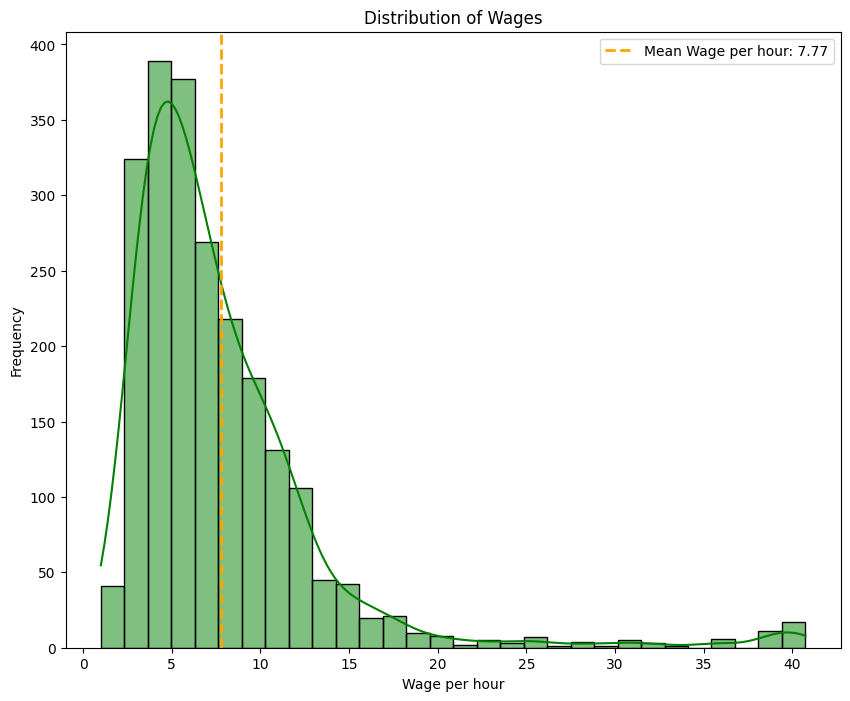

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(df['wage'], kde=True, bins=30, color='green')

mean_wage = df['wage'].mean()
plt.axvline(mean_wage, color='orange', linestyle='dashed', linewidth=2, label=f'Mean Wage per hour: {mean_wage:.2f}')

# Labels and title
plt.xlabel('Wage per hour')
plt.ylabel('Frequency')
plt.title('Distribution of Wages')
plt.legend();

**Observation:** The Mean wage for our data set is 7.77 dollars per hour with most of individuals within the range of around 1 to 15 dollars per hour, and a smaller number of individuals within the higher wage range of above 15 to about 40

**The Relationship between Wages and Hours worked**

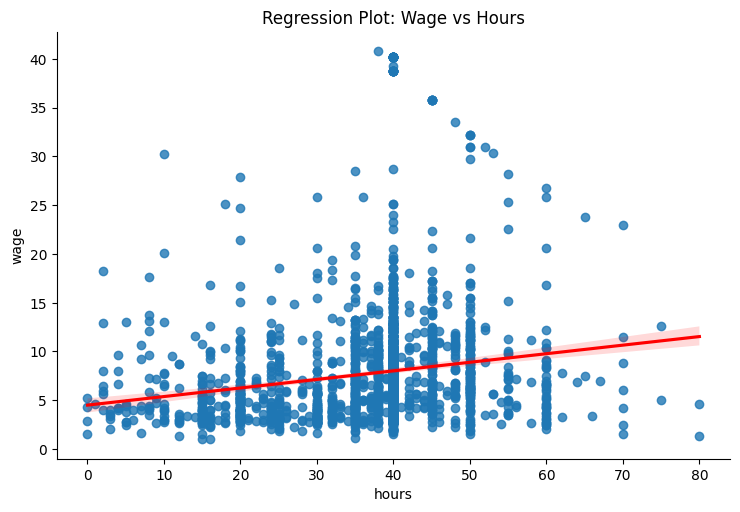

In [16]:
sns.lmplot(x='hours', y='wage', data=df, aspect=1.5, line_kws={'color': 'red'})
plt.title('Regression Plot: Wage vs Hours');

**Observation:** The regression line shows a weak positive correlation between hours worked and wages. It can also be noticed from the graph above that individulas with extreemly high working hours are within the lower range of wages as compared to those with average(around the 40) working hours.

**A bar plot showing the relationship between the Grade Attained and the Wage**

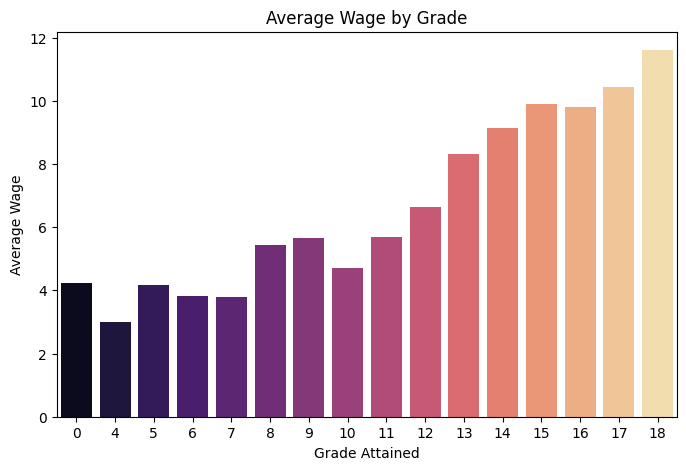

In [17]:
import numpy as np
plt.figure(figsize=(8, 5))
sns.barplot(x=df['grade'], y=df['wage'], estimator=np.mean, ci=None, palette='magma')

plt.xlabel('Grade Attained')
plt.ylabel('Average Wage')
plt.title('Average Wage by Grade');

**Observation:** From the bar chart above, individuals with higher grades attained earn higher wages, however we notice the average for the grade 10 and below flactuate a little, rather than gradually reduce

**Relationship between Collage Graduate Status and Wage**

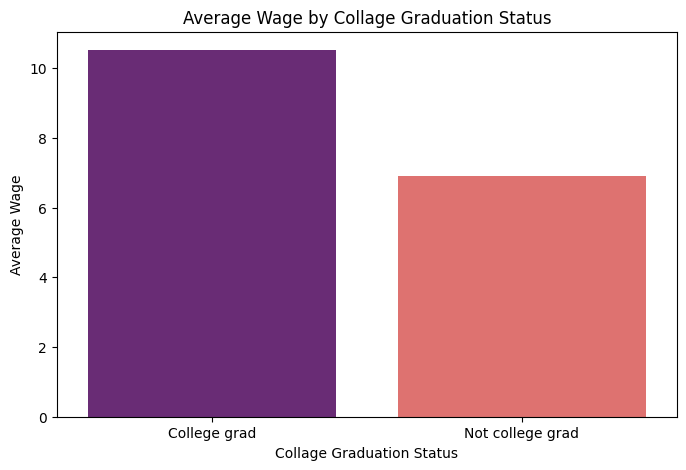

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['collgrad'], y=df['wage'], estimator=np.mean, ci=None, palette='magma')

plt.xlabel('Collage Graduation Status')
plt.ylabel('Average Wage')
plt.title('Average Wage by Collage Graduation Status');

**Observation:** We see that College Graduates get higher wages compared to those who are Not College Graduates

**Relation between Work experience and Wages**

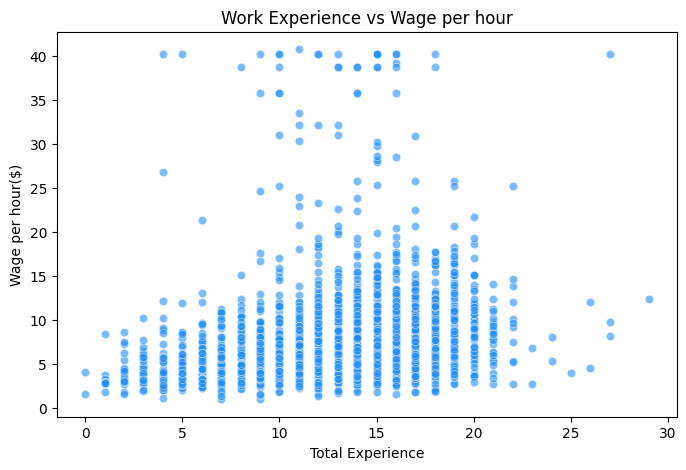

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['ttl_exp'], y=df['wage'], alpha=0.6, color='dodgerblue')
plt.title('Work Experience vs Wage per hour')
plt.xlabel('Total Experience')
plt.ylabel('Wage per hour($)');

**Observation:** From the visualization, most individuals have between 5 to 20 years of experience, with wages primarily ranging between 5 and 15 dollars. There is a noticeable dense cluster around this range, indicating that a majority of employees fall within these experience levels and wage brackets. However, there are some outliers—a few individuals with very high wages (above 30-40) despite varying levels of experience. Generally the plot suggests a weak positive correlation where wages tend to increase slightly with experience, but not in a strictly linear way.

In [20]:
#sns.regplot(x='ttl_exp', y='Total_wages', data=df, line_kws={'color':'red'})
#plt.title("Total Wages vs. Work Experience")

**Relation between Tenure and Work Experience**

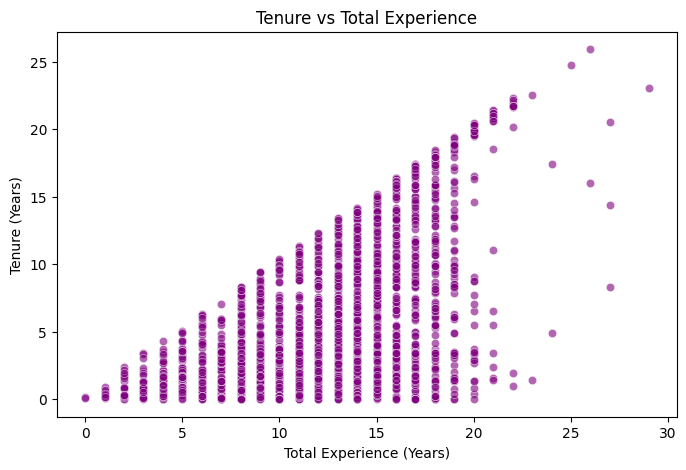

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['ttl_exp'], y=df['tenure'], alpha=0.6, color='purple')
plt.title('Tenure vs Total Experience')
plt.xlabel('Total Experience (Years)')
plt.ylabel('Tenure (Years)');

**Observation:** The scatter plot shows a clear positive correlation between total experience and tenure, as expected. Most data points fall within a triangular region, meaning,  tenure is always less than or equal to total experience. This suggests that individuals may have gained experience from multiple jobs, with tenure representing their duration in a specific role or company. The upper boundary (where tenure equals total experience) represents individuals who have worked at the same place for their entire career.

**Distribution of Work Experience**

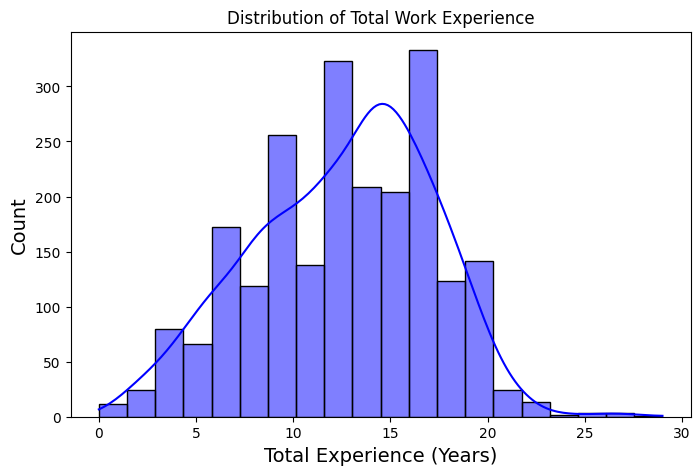

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['ttl_exp'], bins=20, kde=True, color='blue', edgecolor='black')
plt.xlabel("Total Experience (Years)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Total Work Experience");

**Observation:** We see that the distribution of Years of experience in our dataset generally lies between 5 to 20 years.

**Relationship between Education and Work Experience**

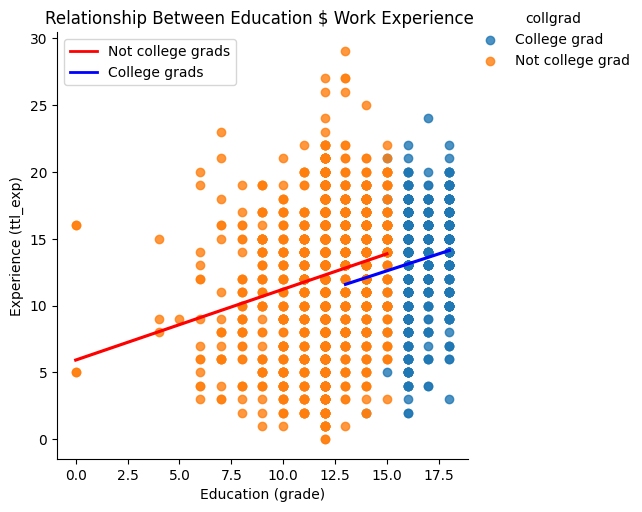

In [23]:
from matplotlib.lines import Line2D
g=sns.lmplot(data=df, x='grade', y='ttl_exp', line_kws={'color':'red'}, hue ='collgrad', ci= None,legend= False)
plt.title('Relationship Between Education $ Work Experience ')
plt.xlabel('Education (grade)')
plt.ylabel('Experience (ttl_exp)')
g.add_legend( title=None, loc='upper right')

lines = plt.gca().get_lines()
lines[1].set_color('red')
lines[0].set_color('blue')

legend_elements = [Line2D([0], [0], color='red', lw=2, label='Not college grads'),
                   Line2D([0], [0], color='blue', lw=2, label='College grads')]

plt.legend(handles=legend_elements, loc='upper left');

**Observation:** from the above visual, we see that college graduates are those who possess the grade 16 and above, with very few cases of college graduates with 14 to 16 points grade.

The trend lines suggest that individuals with lower education levels (non-college grads, in orange) tend to have more years of work experience at any given education level compared to college graduates (in blue). The college graduates' experience starts increasing significantly after reaching higher education levels, reflecting time spent in education before entering the workforce. The positive correlation for both groups suggests that more education generally corresponds to more experience over time.

**Work Experience By Marital Status**

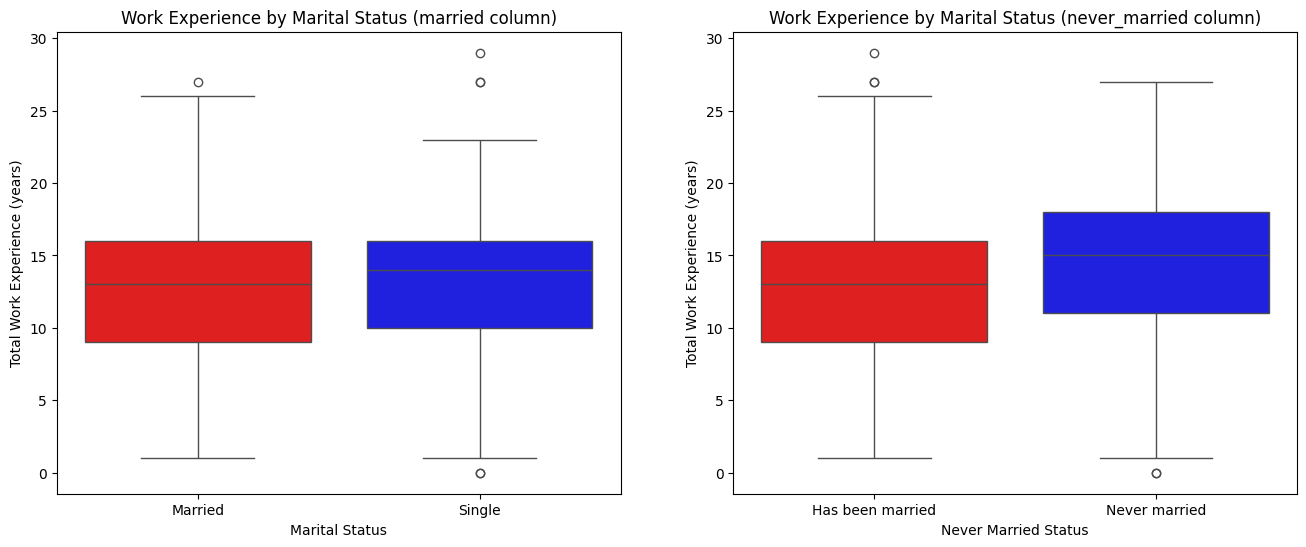

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='married', y='ttl_exp', data=df, ax=ax1, palette=['red', 'blue'])
ax1.set_title('Work Experience by Marital Status (married column)')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Total Work Experience (years)')
# subplot2 - never_married column
sns.boxplot(x='never_married', y='ttl_exp', data=df, ax=ax2, palette=['red', 'blue'])
ax2.set_title('Work Experience by Marital Status (never_married column)')
ax2.set_xlabel('Never Married Status')
ax2.set_ylabel('Total Work Experience (years)')
plt.show()

**Observation:** Work Experience level is seen to vary within the same range for married and has been married marital status categories. There is  slightly higher range for single and Never married categories.

**Work Experience by South and Central City Combination**

Mean work experience by South and Central City combination:
                     south_city    ttl_exp
0      Not south & Central city  12.614943
1  Not south & Not central city  12.555439
2          South & Central city  12.570033
3      South & Not central city  12.481890


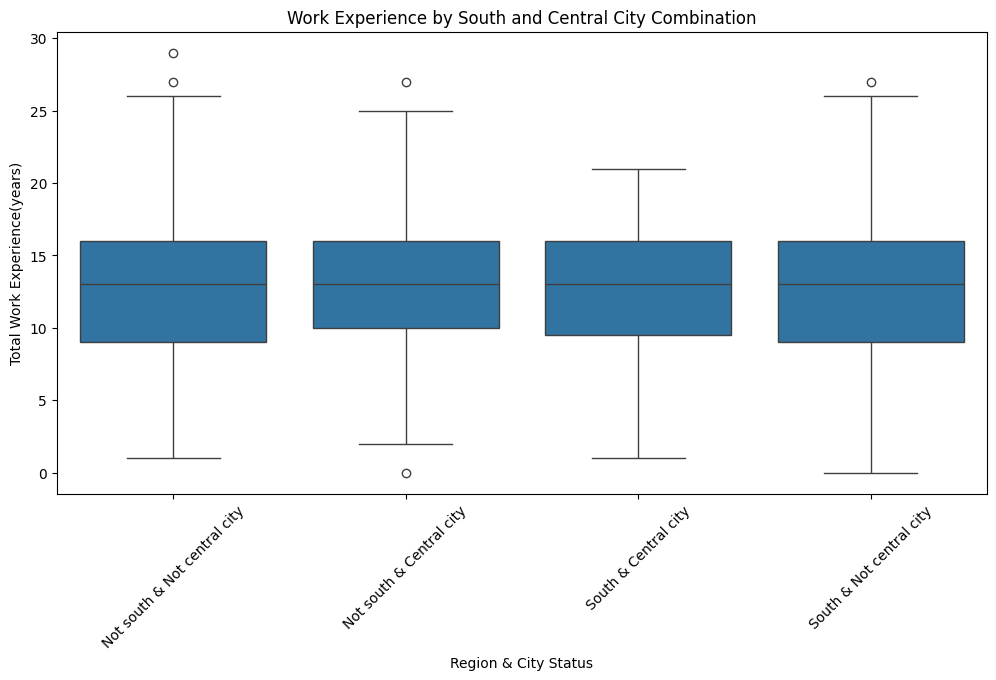

In [25]:
df['south_city'] = df['south'].astype(str) + ' & ' + df['c_city'].astype(str)
combined_exp = df.groupby('south_city')['ttl_exp'].mean().reset_index()
print("\
Mean work experience by South and Central City combination:")
print(combined_exp)

plt.figure(figsize=(12, 6))
sns.boxplot(x='south_city', y='ttl_exp', data=df)
plt.title('Work Experience by South and Central City Combination')
plt.xlabel('Region & City Status')
plt.ylabel('Total Work Experience(years)')
plt.xticks(rotation=45);

**Observation:** We see that the work experience by South and Central City combination is generally within the same range. The presence of ouliers is seen in all combinations except the `South & Central City` category

**Experience by Industry**

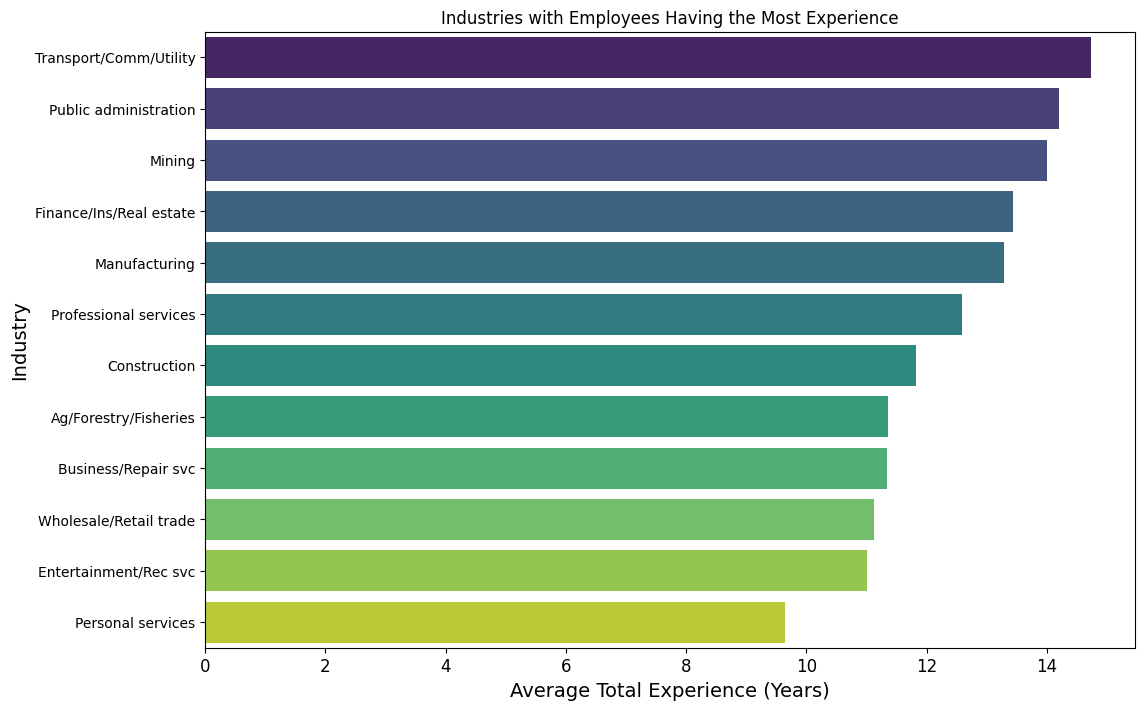

In [26]:
# Plot the results
plt.figure(figsize=(12, 8))

industry_experience = round(df.groupby('industry')['ttl_exp'].mean().sort_values(ascending=False),2)
sns.barplot(y=industry_experience.index, x=industry_experience.values, palette="viridis", order= industry_experience.index)

# Labels & Title
plt.ylabel("Industry", fontsize=14)
plt.xlabel("Average Total Experience (Years)", fontsize=14)
plt.title("Industries with Employees Having the Most Experience")
plt.xticks(fontsize=12);

**Observation:** The industry with employees who have the most experience is `Transport/Comm/Utility`, with `Personal services` and `Other` industries having the least experience.

**Relationship between Numerical Features**

Correlation between Age, Experience, Wages, Tenure, Hours & Grade.

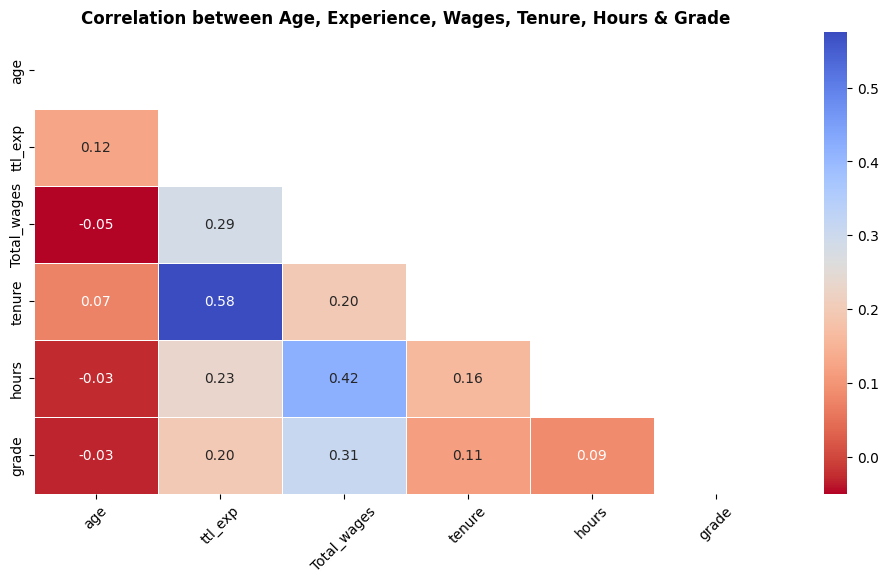

In [27]:
#orrelation between Age, Experience, Wages, Tenure, Hours & Grade
selected_features = ['age', 'ttl_exp', 'Total_wages', 'tenure', 'hours','grade']

# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask= mask ,annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5, cbar=True)
plt.xticks(rotation= 45)
plt.yticks(rotation= 90)
# Set title
plt.title("Correlation between Age, Experience, Wages, Tenure, Hours & Grade", fontsize=12, fontweight='bold')

plt.show()
df.to_csv('nlsw89.csv')

**Observation:** Notably, tenure and total experience show a relatively strong positive correlation (0.58), suggesting that more experience often translates to longer tenure. Wages also exhibit moderate positive correlations with experience (0.27) and grade (0.32). However, age and hours worked show weak or near-zero correlations with other variables, indicating little direct relationship.